In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from collections import Counter

import pickle
import numpy as np

from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as sm

import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
np.set_printoptions(suppress=True)

In [ ]:
t = pd.read_csv('/content/targets2.csv')

In [ ]:
f = pd.read_csv('/content/features2.csv')

In [ ]:
f.head()

,Project_No,Are_there_bookworms_in_your_family?,"Are_you_looking_for_any_special_accessibility_needs,_such_as_a_loved_one_who_needs_a_walker_or_a_wheelchair?",Do_you_need_a_place_of_worship_in_your_house?,Do_you_or_anyone_in_your_family_have_a_collection_that_you_would_like_to_show_off?,How_many_members_are_there_in_your_family?,How_often_do_you_use_the_kitchen?,How_often_do_you_work_from_home?,Is_there_anything_you_are_bringing_with_you_to_your_new_home_from_your_old_house?_Other_than_furniture.,Nature_of_the_space.,...,White_secondary_bedroom,Reds_secondary_bedroom,Grey_secondary_bedroom,We_like_to_socialize_outside_the_house.,We_appreciate_private_spaces_in_our_home.,We_love_hosting_parties_at_home.,The_family_likes_to_gather_together.,We_love_the_outdoors.,We_like_to_stay_at_home.,_Style_
0,2948,1,0,0,1,2,0,2,1,0,...,0,0,1,1,1,0,0,1,1,8
1,3021,1,0,1,0,4,1,2,1,0,...,0,0,0,1,1,0,1,1,1,11
2,3033,0,0,1,1,3,0,1,0,0,...,0,0,0,0,0,1,1,0,1,1
3,3034,1,0,1,0,3,1,2,0,0,...,0,0,1,1,0,0,1,1,1,11
4,3036,1,0,1,1,2,0,1,1,0,...,0,0,0,0,1,1,0,0,1,11


In [ ]:
t.bin_style.value_counts()

1    858
2    858
0    858
Name: bin_style, dtype: int64

In [ ]:
df = pd.concat( [ f , t ], axis = 1)

In [ ]:
df.columns

Index(['Project_No', 'Are_there_bookworms_in_your_family?',
       'Are_you_looking_for_any_special_accessibility_needs,_such_as_a_loved_one_who_needs_a_walker_or_a_wheelchair?',
       'Do_you_need_a_place_of_worship_in_your_house?',
       'Do_you_or_anyone_in_your_family_have_a_collection_that_you_would_like_to_show_off?',
       'How_many_members_are_there_in_your_family?',
       'How_often_do_you_use_the_kitchen?', 'How_often_do_you_work_from_home?',
       'Is_there_anything_you_are_bringing_with_you_to_your_new_home_from_your_old_house?_Other_than_furniture.',
       'Nature_of_the_space.', 'What_is_the_purpose_of_your_space?',
       'What_would_be_the_height_of_the_person_using_the_kitchen?_(This_information_will_help_us_design_the_space_more_ergonomically)',
       'Would_you_be_using_any_of_your_old_furniture?',
       'Does_anyone_in_the_family_have_a_hobby_that_needs_a_specific_place_for_work_and_storage?',
       'What_kind_of_lighting_do_you_prefer_for_your_Bedroom?',
 

In [ ]:

 
''' Detection '''
# IQR
Q1 = np.percentile(df['_Style_'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['_Style_'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['_Style_'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['_Style_'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (2574, 78)
New Shape:  (2574, 78)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


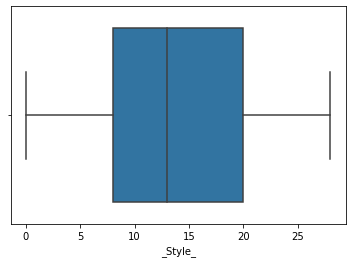

In [ ]:
import seaborn as sns
sns.boxplot(df['_Style_'])

In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# Creating Empty Lists
test_acc = []
train_acc = []
pre = []
rec = []

i=1 

# Performing Stratified KFold Cross Validation
kf = KFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(f,t):
  print('\n{} of kfold {}'.format(i,kf.n_splits))

  # #Splitting Data into Train,Test
  # xtr,xvl = f.loc[train_index],f.loc[test_index]
  # ytr,yvl = t[train_index],t[test_index]

  xtr, xvl, ytr, yvl = train_test_split(f, t,test_size=0.2, random_state = 32)

#   # Creating Model Object
#   model = XGBClassifier(colsample_bylevel = 0.5,colsample_bytree = 0.5,gamma =0.1,learning_rate = 0.1,max_depth = 8,min_child_weight = 15, n_estimators = 100,subsample=0.3)
#   model.fit(xtr, ytr,early_stopping_rounds=4,eval_metric='error',eval_set=[(xvl,yvl)],verbose=0)

#   # Predecting Target Values from X Test
#   pred_test = model.predict(xvl)

#   # Predecting Target Values from X Train
#   y_train_pred = model.predict(xtr)

#   # Creating a Confusion Matrix
#   cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
#   print('Confusion Matrix',cnf_matrix)

#   # Calculating The Test Accuracy
#   score = accuracy_score(yvl,pred_test)

#   # Appending The Obtained Test Accuracy To The List Created
#   test_acc.append(score)
#   print('test accuracy_score',score)

#   # Calculating The Train Accuracy
#   score1 = accuracy_score(ytr,y_train_pred)

#   # Appending The Obtained Train Accuracy To The List Created
#   train_acc.append(score1)
#   print('train accuracy_score',score1)

#   # Calculating The Precision
#   precision = metrics.precision_score(yvl,pred_test)

#   # Appending The Obtained Precision To The List Created
#   pre.append(precision)
#   print('precision_score',precision)

#   # Calculating The Recall
#   recall = metrics.recall_score(yvl,pred_test)

#   # Appending The Obtained Recall To The List Created
#   rec.append(recall)
#   print('recall_score',precision)

#   # Calculating The F1 Score
#   f1 = metrics.f1_score(yvl,pred_test)
#   print('F1 Score :' , f1)

#   i+=1

# print('\nAverage Test Accuracy', np.mean(test_acc)*100)
# print('\nAverage Train Accuracy', np.mean(train_acc)*100)
# print('\nAverage Precision', np.mean(pre))
# print('\nAverage Recall', np.mean(rec))

  # Creating Model Object
  model = KNeighborsClassifier()
  model.fit(xtr, ytr)
  #Predecting Target Values from X test
  pred_test = model.predict(xvl)

  # Predecting Target Values from X Train
  y_train_pred = model.predict(xtr)

  # Creating a Confusion Matrix
  cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
  print('Confusion Matrix',cnf_matrix)

  # Calculating The Test Accuracy
  score = accuracy_score(yvl,pred_test)

  # Appending The Obtained Test Accuracy To The List Created
  test_acc.append(score)
  print('test accuracy_score',score)

  # Calculating The Train Accuracy
  score1 = accuracy_score(ytr,y_train_pred)

  # Appending The Obtained Train Accuracy To The List Created
  train_acc.append(score1)
  print('train accuracy_score',score1)

  # # Calculating The Precision
  # precision = metrics.precision_score(yvl,pred_test)

  # # Appending The Obtained Precision To The List Created
  # pre.append(precision)
  # print('precision_score',precision)

  # # Calculating The Recall
  # recall = metrics.recall_score(yvl,pred_test)

  # # Appending The Obtained Recall To The List Created
  # rec.append(recall)
  # print('recall_score',precision)

  # Calculating The F1 Score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  result = confusion_matrix(yvl, pred_test)
  print('Confusion Matrix:')
  print(result)
  result1 = classification_report(yvl, pred_test)
  print('Classification Report:',)
  print (result1)
  result2 = accuracy_score(yvl, pred_test)
  print('Accuracy:',result2)

  i+=1

print('\nAverage Test Accuracy', np.mean(test_acc)*100)
print('\nAverage Train Accuracy', np.mean(train_acc)*100)
# print('\nAverage Precision', np.mean(pre))
# print('\nAverage Recall', np.mean(rec))


1 of kfold 5
Confusion Matrix [[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


test accuracy_score 0.7533980582524272
train accuracy_score 0.8460417678484702
Confusion Matrix:
[[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       166
           1       0.69      0.76      0.73       169
           2       0.80      0.59      0.68       180

    accuracy                           0.75       515
   macro avg       0.76      0.76      0.75       515
weighted avg       0.76      0.75      0.75       515

Accuracy: 0.7533980582524272

2 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix [[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
test accuracy_score 0.7533980582524272
train accuracy_score 0.8460417678484702
Confusion Matrix:
[[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       166
           1       0.69      0.76      0.73       169
           2       0.80      0.59      0.68       180

    accuracy                           0.75       515
   macro avg       0.76      0.76      0.75       515
weighted avg       0.76      0.75      0.75       515

Accuracy: 0.7533980582524272

3 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix [[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
test accuracy_score 0.7533980582524272
train accuracy_score 0.8460417678484702
Confusion Matrix:
[[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       166
           1       0.69      0.76      0.73       169
           2       0.80      0.59      0.68       180

    accuracy                           0.75       515
   macro avg       0.76      0.76      0.75       515
weighted avg       0.76      0.75      0.75       515

Accuracy: 0.7533980582524272

4 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix [[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
test accuracy_score 0.7533980582524272
train accuracy_score 0.8460417678484702
Confusion Matrix:
[[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       166
           1       0.69      0.76      0.73       169
           2       0.80      0.59      0.68       180

    accuracy                           0.75       515
   macro avg       0.76      0.76      0.75       515
weighted avg       0.76      0.75      0.75       515

Accuracy: 0.7533980582524272

5 of kfold 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix [[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
test accuracy_score 0.7533980582524272
train accuracy_score 0.8460417678484702
Confusion Matrix:
[[153   8   5]
 [ 19 129  21]
 [ 25  49 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       166
           1       0.69      0.76      0.73       169
           2       0.80      0.59      0.68       180

    accuracy                           0.75       515
   macro avg       0.76      0.76      0.75       515
weighted avg       0.76      0.75      0.75       515

Accuracy: 0.7533980582524272

Average Test Accuracy 75.33980582524272

Average Train Accuracy 84.60417678484703


In [ ]:
xtr, xvl, ytr, yvl = train_test_split(f, t,test_size=0.2, random_state = 32)


In [ ]:
yvl

In [ ]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(xtr, ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# Predict from the test dataset
predictions = svn.predict(xvl)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(yvl, predictions)

0.4058252427184466

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(xtr, ytr)
  
prediction = svc_model .predict(xvl)
# check the accuracy on the training set
print(svc_model.score(xtr, ytr))
print(svc_model.score(xvl, yvl))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.725594949004371
0.6932038834951456


In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(xtr, ytr)
  
prediction = svc_model .predict(xvl)
# check the accuracy on the training set
print(svc_model.score(xtr, ytr))
print(svc_model.score(xvl, yvl))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4230208839242351
0.4058252427184466


In [ ]:
svc_model = SVC(kernel='poly')
svc_model.fit(xtr, ytr)
  
prediction = svc_model .predict(xvl)
# check the accuracy on the training set
print(svc_model.score(xtr, ytr))
print(svc_model.score(xvl, yvl))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4283632831471588
0.39029126213592236


In [ ]:
# SVC(kernel='sigmoid')
svc_model = SVC(kernel='sigmoid')
svc_model.fit(xtr, ytr)
  
prediction = svc_model .predict(xvl)
# check the accuracy on the training set
print(svc_model.score(xtr, ytr))
print(svc_model.score(xvl, yvl))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2676056338028169
0.31844660194174756


# **DT**

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(xtr, ytr)

print('Training data accuracy {:.2f}'.format(decision_tree.score(xtr, ytr)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(xvl, yvl)*100))


Training data accuracy 100.00
Testing data accuracy 92.43


In [ ]:
prediction = decision_tree.predict(xvl)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(yvl, prediction) 

In [ ]:
print(cm)

[[154  10   2]
 [ 15 153   1]
 [  3   8 169]]


In [ ]:
classification_report = classification_report(yvl, prediction)

In [ ]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       166
           1       0.89      0.91      0.90       169
           2       0.98      0.94      0.96       180

    accuracy                           0.92       515
   macro avg       0.92      0.92      0.92       515
weighted avg       0.93      0.92      0.92       515



In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(xtr, ytr)

print('Training data accuracy {:.2f}'.format(decision_tree.score(xtr, ytr)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(xvl, yvl)*100))

Training data accuracy 100.00
Testing data accuracy 93.20


In [ ]:
prediction = decision_tree.predict(xvl)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(yvl, prediction) 

In [ ]:
print(cm)

[[155   9   2]
 [ 12 156   1]
 [  3   8 169]]


In [ ]:
classification_report = classification_report(yvl, prediction)

In [ ]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.90      0.92      0.91       169
           2       0.98      0.94      0.96       180

    accuracy                           0.93       515
   macro avg       0.93      0.93      0.93       515
weighted avg       0.93      0.93      0.93       515



In [ ]:
# Importing Libraries
import pickle
import numpy as np

file_name = " DT.pkl"

# Saving The Model
pickle.dump(decision_tree, open(file_name, "wb"))



In [ ]:
# Loading the Model
Desicion_Tree_Model = pickle.load(open(file_name, "rb"))